# Explore Residuals
This notebook reads the predictions from `./data/predictions` for AirBnB prices and analyzes the residuals.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

%matplotlib inline

In [2]:
airbnb_data = pd.read_csv('../data/predictions/oof_linear_regression.csv')

In [3]:
airbnb_data.columns

Index(['latitude', 'longitude', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'price', 'crime_index', 'dist_0', 'dist_1', 'dist_2', 'dist_3',
       'dist_4', 'dist_5', 'dist_6', 'dist_7', 'oof_pred'],
      dtype='object')

In [4]:
airbnb_data['residual'] = airbnb_data['price'] - airbnb_data['oof_pred']

Text(0.5, 0, 'Residual')

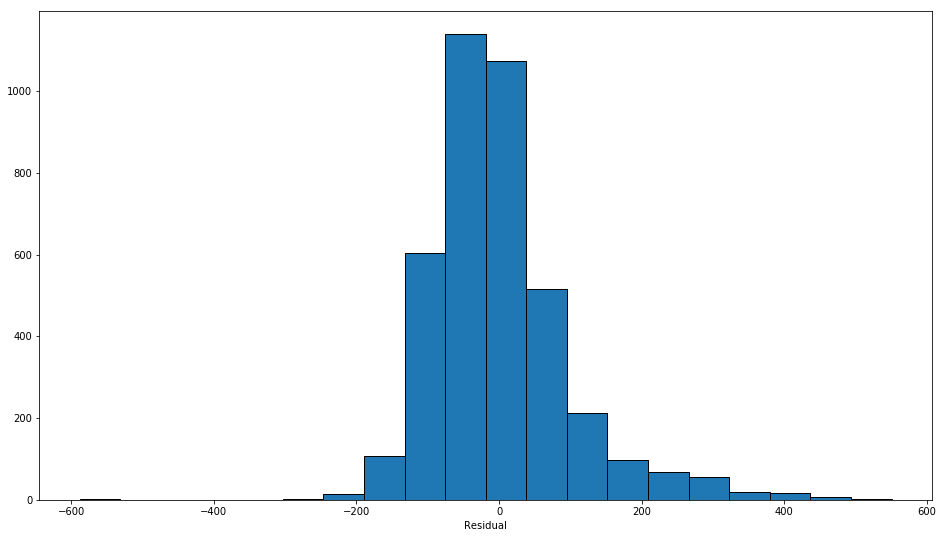

In [5]:
plt.figure(figsize = (16, 9))
plt.hist(
    airbnb_data['residual'],
    bins = 20,
    edgecolor = 'k'
);
plt.xlabel('Residual')

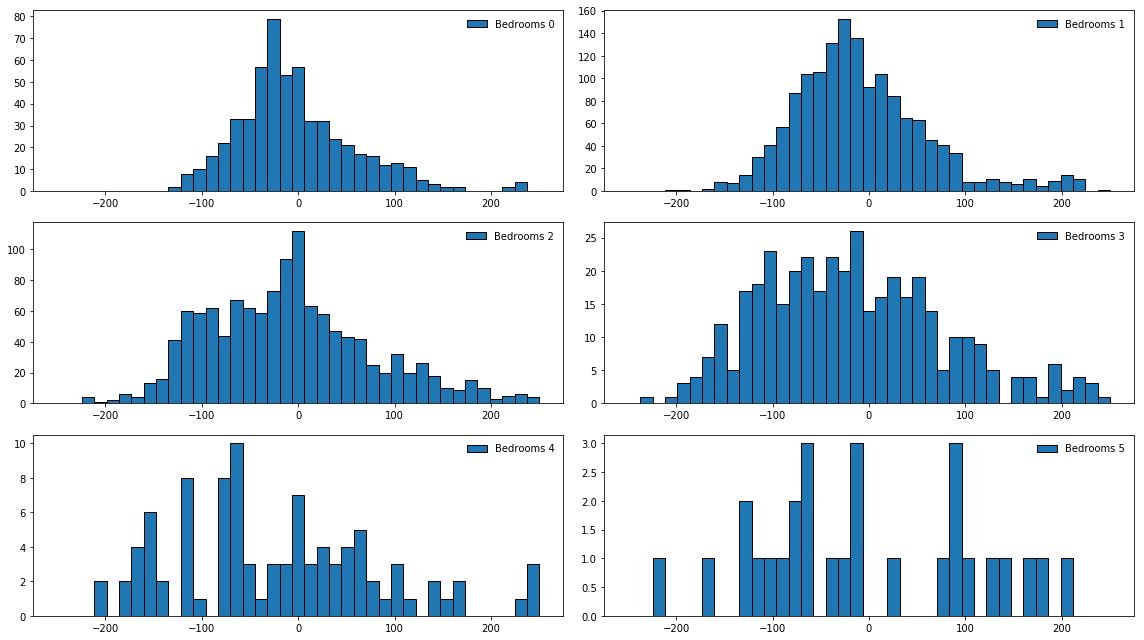

In [6]:
plt.figure(figsize = (16, 9))

for index in range(6):
    plt.subplot(3, 2, index + 1)
    
    data_subset = airbnb_data[airbnb_data['bedrooms'] == index]
    plt.hist(
        data_subset['residual'],
        bins = np.linspace(-250, 250, 40),
        edgecolor = 'k',
        label = 'Bedrooms {}'.format(index)
    )
    
    plt.legend(frameon = False)


plt.tight_layout()

Text(0, 0.5, 'Predicted Price')

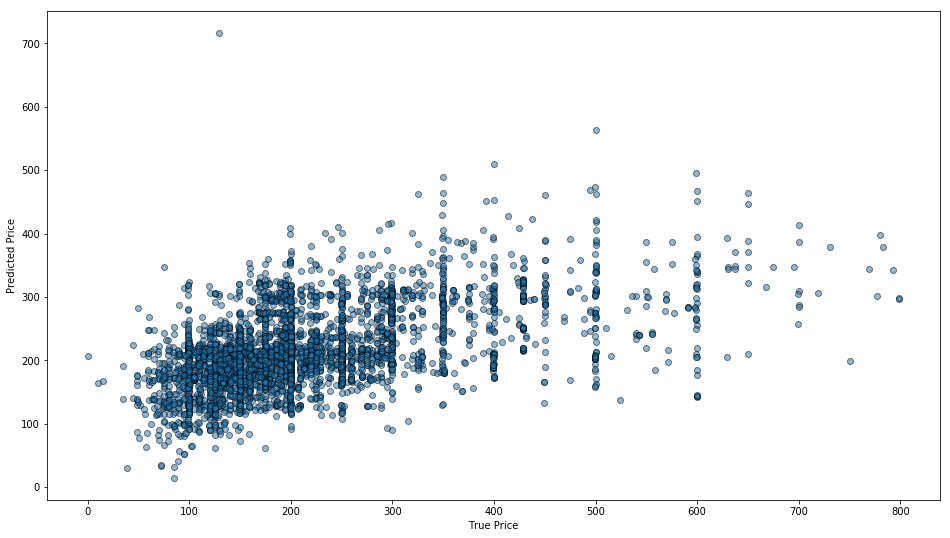

In [7]:
plt.figure(figsize = (16, 9))
plt.scatter(
    airbnb_data['price'],
    airbnb_data['oof_pred'],
    edgecolor = 'k',
    alpha = 0.5
)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

Text(0, 0.5, 'Price Residual')

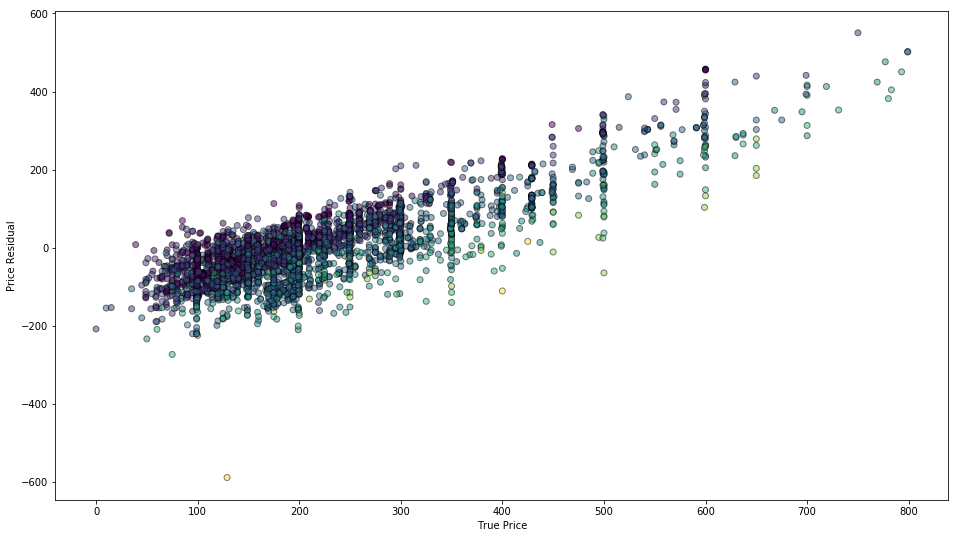

In [8]:
plt.figure(figsize = (16, 9))
plt.scatter(
    airbnb_data['price'],
    airbnb_data['residual'],
    c = airbnb_data['bedrooms'],
    edgecolor = 'k',
    alpha = 0.5
)
plt.xlabel('True Price')
plt.ylabel('Price Residual')

Text(0, 0.5, 'Price Residual')

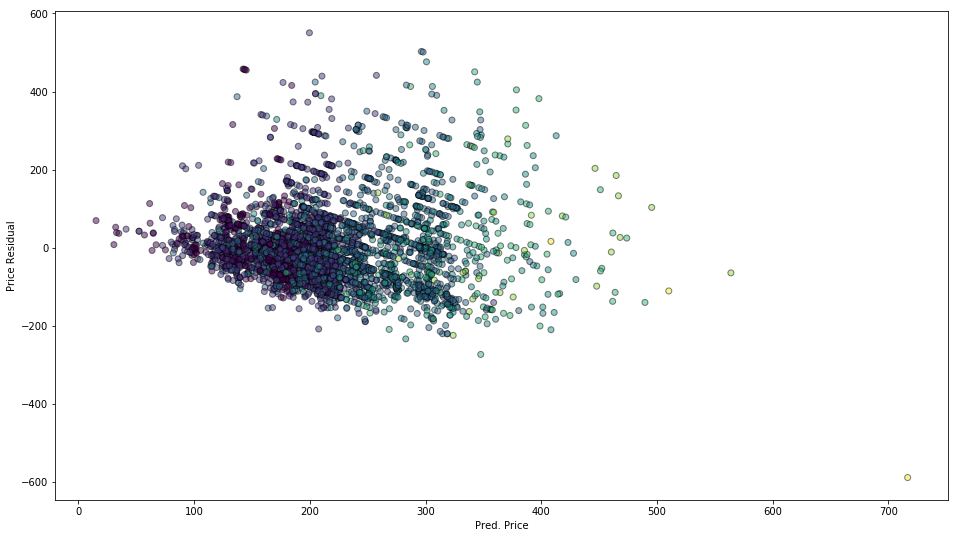

In [9]:
plt.figure(figsize = (16, 9))
plt.scatter(
    airbnb_data['oof_pred'],
    airbnb_data['residual'],
    c = airbnb_data['bedrooms'],
    edgecolor = 'k',
    alpha = 0.5
)
plt.xlabel('Pred. Price')
plt.ylabel('Price Residual')